## Re-slicing
This example shows the use of the function ``reslice_image``. We assume you have produced an isolation mask and a deformation file (``y_suitdef.nii``) using the Matlab version of the toolbox as described in the last step. 

In [12]:
# Import necessary packages
from nilearn import plotting
import SUITPy.reslice as reslice

### Reslice image without mask
The reslice function takes at he mininum 2 input parameters: The list of source images (the images that you want to reslice) and the deformation map.

In [13]:
output_list = reslice.reslice_image(source_image = 'anatomical_sess-01.nii',
                                    deformation = 'y_suitdef.nii')

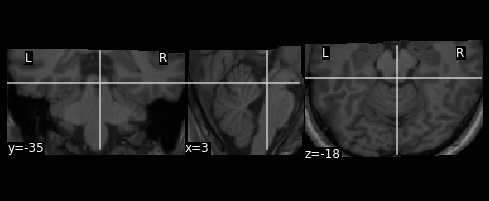

In [14]:
plotting.plot_anat(output_list)

In [15]:
import nibabel as nib

nib.save(output_list, "img1.nii")

### Reslice image with mask 
For cerebellar data analysis, it is good practice to mask the functional images to only retain the cerebellum before any smoothing occurrs. This prevents un-wanted spill-over of neocortical signal into the cerebellum. As a cerebellar mask you can use the mask produced in the [https://www.diedrichsenlab.org/imaging/suit_function.htm#suit_isolate_seg] of the matlab toolbox. 

In [16]:
output_list = reslice.reslice_image(source_image = 'anatomical_sess-01.nii', 
                                    deformation = 'y_suitdef.nii',
                                    mask = 'c_anatomical_sess-01_pcereb.nii')

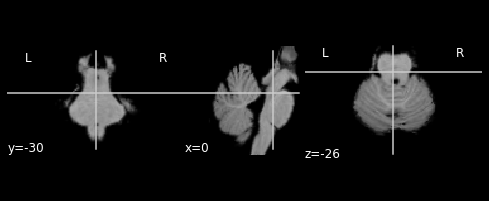

In [17]:
plotting.plot_anat(output_list)
nib.save(output_list, "img2.nii")

### Specific voxel size
By default, the new image will be resliced into the same resolution and bouding box as the deformation map (y_xxx.nii). For functional data we often would like a different resolution. For this, you can simply specify the voxel size. 

In [18]:
output_list = reslice.reslice_image(source_image = 'anatomical_sess-01.nii',
                                    deformation = 'y_suitdef.nii',
                                    mask = 'c_anatomical_sess-01_pcereb.nii',
                                    voxelsize = (2,3,2))

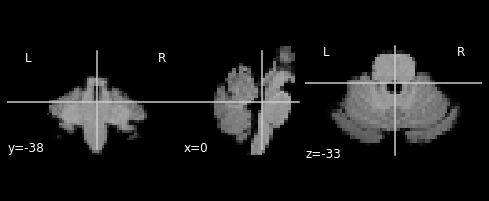

In [19]:
plotting.plot_anat(output_list)
nib.save(output_list, "img3.nii")

In [20]:
# Voxel size has been changed.
output_list.affine

array([[  -2.,    0.,    0.,   70.],
       [   0.,    3.,    0., -100.],
       [   0.,    0.,    2.,  -75.],
       [   0.,    0.,    0.,    1.]])

### Specific image size

In [21]:
output_list = reslice.reslice_image(source_image = "anatomical_sess-01.nii",
                                    deformation = "y_suitdef.nii", 
                                    mask = "c_anatomical_sess-01_pcereb.nii", 
                                    imagesize=(150, 150, 150))

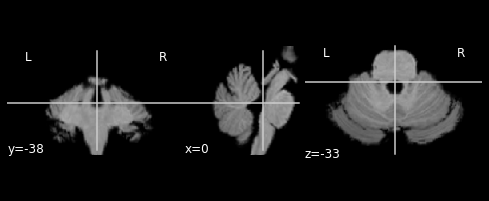

In [22]:
plotting.plot_anat(output_list)
nib.save(output_list, "img4.nii")

In [23]:
# Image shape has been changed
output_list.shape

(150, 150, 150)